In [1]:
import scanpy as sc
import scanpy.external as sce
import anndata as ad
import pandas as pd
from scipy.io import mmread

# Temporarily suppress FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# data load

In [3]:
# rna

In [4]:
data = sc.read_h5ad('gex_hto_data/all_pbmcs/all_pbmcs_rna.h5ad')

In [5]:
# metadata

In [6]:
meta = pd.read_csv('gex_hto_data/all_pbmcs/all_pbmcs_metadata.csv', index_col=0)

In [7]:
data.obs = data.obs.join(meta)

In [8]:
# hto

In [9]:
matrix_hto = (mmread('gex_hto_data/all_pbmcs/all_pbmcs_hto/matrix_hto.mtx'))

In [10]:
matrix_hto = matrix_hto.todense()

In [11]:
genes_hto = pd.read_csv('gex_hto_data/all_pbmcs/all_pbmcs_hto/genes_hto.tsv', sep='\t', header=None)
barcodes_hto = pd.read_csv('gex_hto_data/all_pbmcs/all_pbmcs_hto/barcodes_hto.tsv', sep='\t', header=None)

In [12]:
data_hto = pd.DataFrame(matrix_hto.T, columns=genes_hto[0], index = barcodes_hto[0])

In [13]:
data.obs = data.obs.join(data_hto)

In [14]:
# processing

In [15]:
sc.pp.highly_variable_genes(data, min_mean=0.0125, max_mean=3, min_disp=0.5, batch_key = 'Batch')

In [16]:
data = data[:, data.var.highly_variable]

In [17]:
sc.pp.regress_out(data, ['nCount_RNA', 'percent.mt'])

In [18]:
sc.pp.scale(data, max_value=10)

In [19]:
sc.tl.pca(data, svd_solver = 'arpack')

In [22]:
sce.pp.harmony_integrate(data, 'Batch')

2023-01-06 05:24:34,929 - harmonypy - INFO - Iteration 1 of 10
2023-01-06 05:49:26,108 - harmonypy - INFO - Iteration 2 of 10
2023-01-06 06:14:36,229 - harmonypy - INFO - Iteration 3 of 10
2023-01-06 06:40:08,950 - harmonypy - INFO - Iteration 4 of 10
2023-01-06 07:01:50,815 - harmonypy - INFO - Iteration 5 of 10
2023-01-06 07:10:47,187 - harmonypy - INFO - Iteration 6 of 10
2023-01-06 07:19:40,717 - harmonypy - INFO - Converged after 6 iterations


In [26]:
data.obsm['X_pca'] = data.obsm['X_pca_harmony']
sc.pp.neighbors(data, n_pcs = 30, n_neighbors = 15)

2023-01-06 16:38:28.098806: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-01-06 16:38:28.954117: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/extras/CUPTI/lib64:
2023-01-06 16:38:28.954139: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [27]:
sc.tl.umap(data)

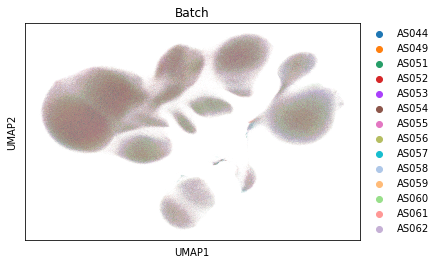

In [32]:
sc.pl.umap(data, color=['Batch'])

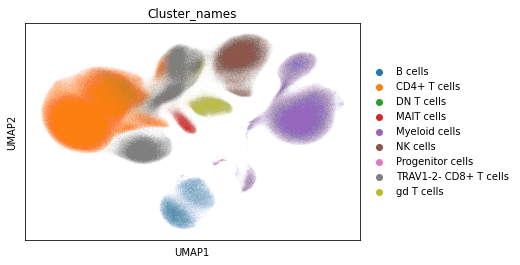

In [37]:
sc.pl.umap(data, color=['Cluster_names'])